# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [11]:
data.shape

(108806, 4)

In [12]:
data.tail()

,Unnamed: 0,x,y,comment_class
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1
108805,108805,37.451249,55.836620,-1


In [8]:
data_comment = pd.read_excel('geo_comment.xlsx')
data_comment.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [17]:
from sklearn.preprocessing import StandardScaler

In [41]:
# нормализуем данные
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

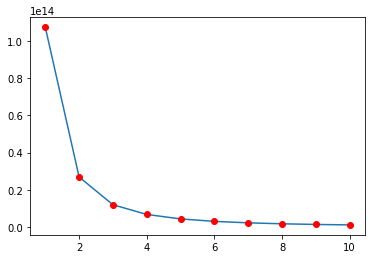

In [42]:
# подбираем оптимальное количество кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()

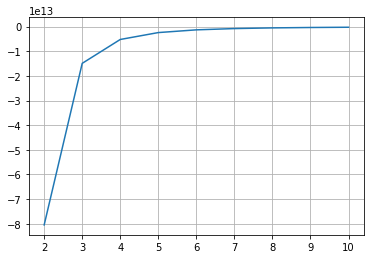

In [43]:
# Посмотрим изменение inertia

diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)
plt.grid()

$${inertia_{k+1}-inertia_{k}}$$

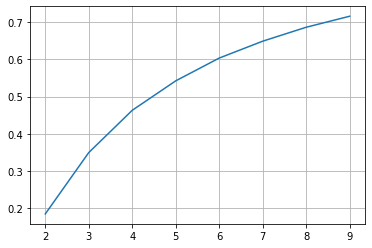

In [44]:
# Найдем оптимальное число кластеров

diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)
plt.grid()

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [45]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

In [61]:
# Оптимальное число кластеров = 2

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data)
clusters

array([1, 1, 1, ..., 0, 0, 0])

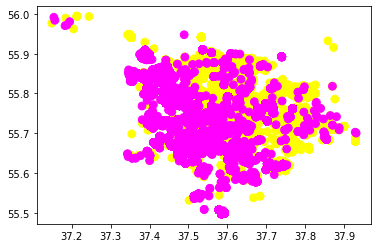

In [62]:
plt.scatter(data['x'], data['y'], cmap='spring', c=clusters, s=60)
plt.show()

In [50]:
data_yes = data[data['comment_class'] == 1]

In [58]:
data_yes.shape

(13659, 4)

In [51]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_yes)
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

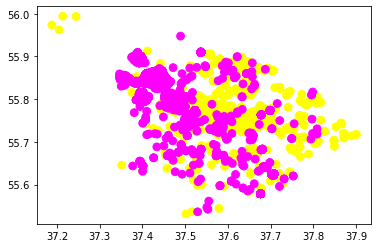

In [53]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data_yes)
plt.scatter(data_yes['x'], data_yes['y'], cmap='spring', c=clusters, s=60)
plt.show()

In [54]:
data_no = data[data['comment_class'] == -1]

In [57]:
data_no.shape

(95147, 4)

In [55]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_no)
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

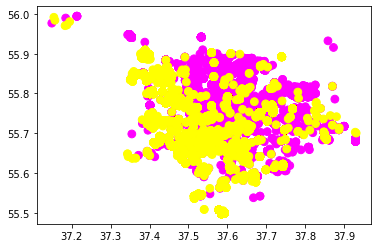

In [56]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data_no)
plt.scatter(data_no['x'], data_no['y'], cmap='spring', c=clusters, s=60)
plt.show()